In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [10]:
df = pd.read_csv("data/UAS.csv")
df

,Panas_Dingin,Pilek,Sakit_Kepala,demam,Flu
0,1,0,Sedang,1,0
1,1,1,Tidak,0,1
2,1,0,Kuat,1,1
3,0,1,Sedang,1,1
4,0,0,Tidak,0,0
5,0,1,Kuat,1,1
6,0,1,Kuat,0,0
7,1,1,Sedang,1,1


In [11]:
X = df.drop(columns="Flu")
y = df.Flu

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 4), (2, 4), (6,), (2,))

In [13]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["demam"]),
    ('categoric', cat_pipe(encoder='onehot'), ['Panas_Dingin', 'Pilek', 'Sakit_Kepala']),
])

In [14]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['demam']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Panas_Dingin', 'Pilek',
                                                   'Sakit_Kepala'])])),
                ('algo', GaussianNB())])

In [16]:
pipeline.score(X_train, y_train)

0.8333333333333334

In [17]:
pipeline.score(X_test, y_test)

0.5

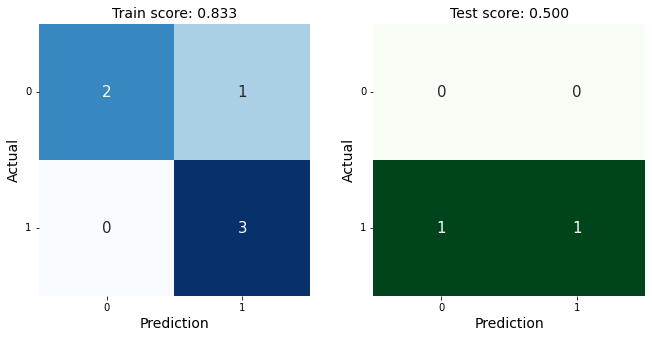

In [18]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [80]:
##Prediction##

In [19]:
X_pred = pd.read_csv("data/UAS_testing.csv")
X_pred

,Panas_Dingin,Pilek,Sakit_Kepala,demam
0,1,0,Tidak,1


In [20]:
pipeline.predict(X_pred)

array([0], dtype=int64)

In [21]:
X_pred["Flu"] = pipeline.predict(X_pred)
X_pred

,Panas_Dingin,Pilek,Sakit_Kepala,demam,Flu
0,1,0,Tidak,1,0
